In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("heart_tidy.csv")
df.head(10)

,Age,Sex,ChestPainType,RestingBP,CholesterolLevel,FastingBloodSugar,RestingElectrocardiographicResult,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,NumMajorVessels,ThalliumStressRest,HeartDiseasePresent,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,NaN,NaN,NaN,NaN,NaN
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,NaN,NaN,NaN,NaN,NaN
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,NaN,NaN,NaN,NaN,NaN
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,NaN,NaN,NaN,NaN,NaN
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,NaN,NaN,NaN,NaN,NaN
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0,NaN,NaN,NaN,NaN,NaN
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1,NaN,NaN,NaN,NaN,NaN
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0,NaN,NaN,NaN,NaN,NaN
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1,NaN,NaN,NaN,NaN,NaN
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(300, 14)

In [3]:
df = df.drop(['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'],axis=1)

In [4]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,CholesterolLevel,FastingBloodSugar,RestingElectrocardiographicResult,MaxHeartRate,ExerciseAngina,STDepression,STSegmentSlope,NumMajorVessels,ThalliumStressRest,HeartDiseasePresent
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
5,56,1,2,120,236,0,0,178,0,0.8,1,0,3,0
6,62,0,4,140,268,0,2,160,0,3.6,3,2,3,1
7,57,0,4,120,354,0,0,163,1,0.6,1,0,3,0
8,63,1,4,130,254,0,2,147,0,1.4,2,1,7,1
9,53,1,4,140,203,1,2,155,1,3.1,3,0,7,1


Confusion Matrix:
[[28  3]
 [ 7 22]]


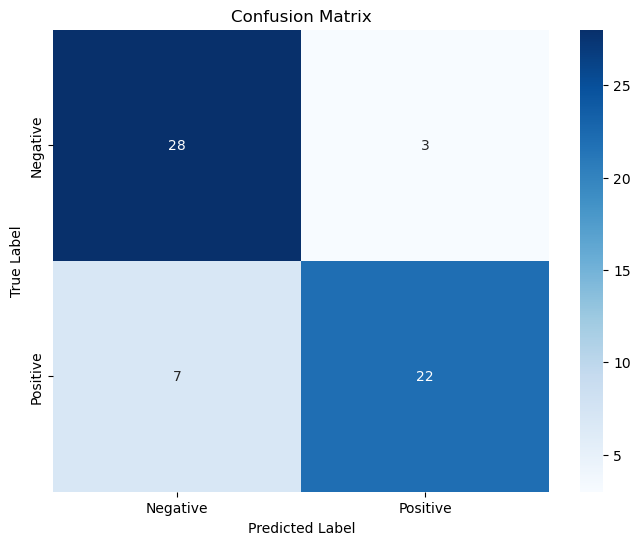

In [5]:
X = df.drop('HeartDiseasePresent', axis=1) 
y = df['HeartDiseasePresent']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', make_pipeline(StandardScaler(), LogisticRegression(random_state=42))),
    ('knn', make_pipeline(StandardScaler(), KNeighborsClassifier()))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

import seaborn as sns

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)


Accuracy: 0.8333333333333334
Precision: 0.88
Recall: 0.7586206896551724
F1 Score: 0.8148148148148148


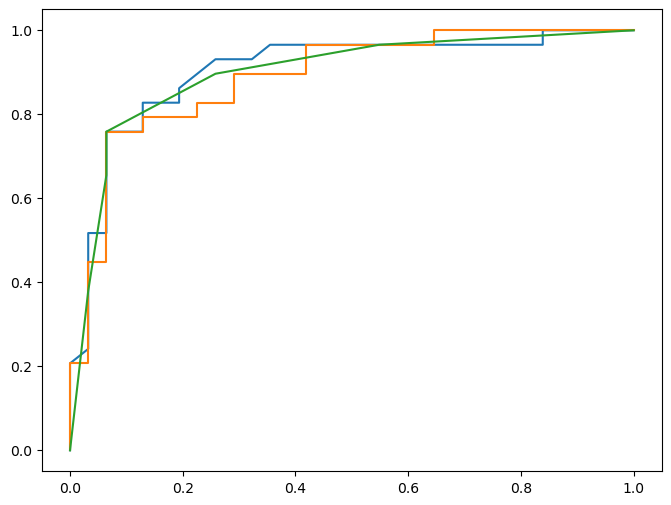

In [7]:
# Plot ROC curve and compute AUC
plt.figure(figsize=(8, 6))
for model_name, model in base_models:
    if 'pipeline' in str(type(model)):
        y_score = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    else:
        y_score = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, roc_auc))


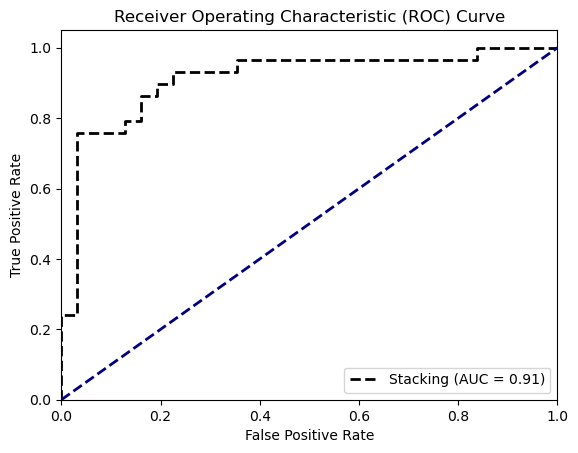

In [8]:
# Plot ROC curve for stacking classifier
y_score = stacking_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='Stacking (AUC = %0.2f)' % roc_auc, linestyle='--', linewidth=2, color='black')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()